<a href="https://colab.research.google.com/github/Jothish2283/RCNN_torch/blob/main/RCNN_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Getting the data**

In [1]:
!pip install -q --upgrade selectivesearch torch_snippets
from torch_snippets import *
import selectivesearch
from google.colab import files
import pandas as pd

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jothishs","key":"dc1dc9d856809d36afeed01f62aa33fc"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sixhky/open-images-bus-trucks/
!unzip -qq open-images-bus-trucks.zip

kaggle.json
100% 365M/367M [00:16<00:00, 18.6MB/s]
100% 367M/367M [00:16<00:00, 23.1MB/s]


##**Data Visualization**

In [168]:
img_dir="images/images"

In [169]:
box_df=pd.read_csv("/content/df.csv")
box_df.head()

ImageID  Source LabelName  Confidence      XMin      XMax  \
0  0000599864fd15b3  xclick       Bus           1  0.343750  0.908750   
1  00006bdb1eb5cd74  xclick     Truck           1  0.276667  0.697500   
2  00006bdb1eb5cd74  xclick     Truck           1  0.702500  0.999167   
3  00010bf498b64bab  xclick       Bus           1  0.156250  0.371250   
4  00013f14dd4e168f  xclick       Bus           1  0.287500  0.999375   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.156162  0.650047           1            0  ...            0         0   
1  0.141604  0.437343           1            0  ...            0         0   
2  0.204261  0.409774           1            1  ...            0         0   
3  0.269188  0.705228           0            0  ...            0         0   
4  0.194184  0.999062           0            1  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.421875  0.343750  0.795000  0.908750  0.156162  0.512700  0.650047   
1  0.299167  0.276667  0.697500  0.659167  0.141604  0.241855  0.352130   
2  0.849167  0.702500  0.906667  0.999167  0.204261  0.398496  0.409774   
3  0.274375  0.371250  0.311875  0.156250  0.269188  0.493882  0.705228   
4  0.920000  0.999375  0.648750  0.287500  0.194184  0.303940  0.999062   

   XClick4Y  
0  0.457197  
1  0.437343  
2  0.295739  
3  0.521691  
4  0.523452  

[5 rows x 21 columns]

In [170]:
def show_samples(idx, df=box_df, toshow=True):

  df=df[["ImageID","LabelName","XMin","XMax", "YMin", "YMax"]]
  unique_id=df.ImageID.unique()
  id=unique_id[idx]
  df=df[df["ImageID"]==id]

  labels=df.LabelName.values.tolist()
  img_path="images/images/"+id+".jpg"
  img=cv2.imread(img_path, 1)[...,::-1] #BGR->RGB
  h,w,c=img.shape
  boxes=df[[ "XMin","YMin", "XMax", "YMax"]].values
  boxes=(np.array(boxes)*np.array([w,h,w,h])).astype(np.uint16)

  if toshow:
    show(img, bbs=boxes, texts=labels, sz=8)
  return img, boxes, labels, img_path

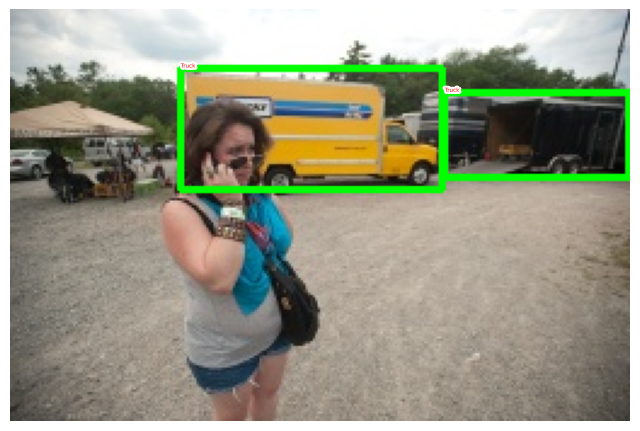

In [171]:
img, boxes, labels, img_path=show_samples(1) #boxes->[[]] labels->[]

In [172]:
boxes

array([[ 70,  24, 178,  74],
       [179,  34, 255,  69]], dtype=uint16)

##**Helper Functions**

In [173]:
def select_candidates(img=None, img_path=None):
  if img_path:
    img=read(img_path, 1)

  img_labels, regions=selectivesearch.selective_search(img, scale=200, min_size=100)

  candidates=[]
  img_ar=np.prod(img.shape[:2])
  for r in regions:
      if r["size"]>img_ar: continue
      if r["size"]<(0.05*img_ar): continue
      if r["rect"] in candidates:continue
      x,y,w,h=r["rect"]
      candidates.append(r["rect"]) #r["rect"]->tuple, this converts tuple->list
  return np.array(candidates).tolist() #candidates->[[]]

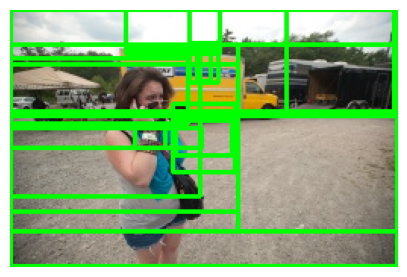

# bounding box:  22

In [174]:
show(img_path,bbs=select_candidates(img_path=img_path))
print("\n\n# bounding box: ",len(select_candidates(img_path=img_path)))

In [175]:
def box_ar(box):
  if (box[2]-box[0])>0 and (box[3]-box[1])>0:
    ar=(box[2]-box[0])*(box[3]-box[1])
  else:
    ar=0
  return ar

def IOU(boxa, boxb, epsilon=1e-5):
  intersection_box=[max(boxa[0], boxb[0]), max(boxa[1], boxb[1]), min(boxa[2], boxb[2]), min(boxa[3], boxb[3])]
  intersection_ar=box_ar(intersection_box)
  boxa_ar=box_ar(boxa)
  boxb_ar=box_ar(boxb)
  union_ar=boxa_ar+boxb_ar-intersection_ar
  iou=intersection_ar/(union_ar + epsilon)
  return iou

##**Pre-processing**

In [176]:
FPATHS, GTBBS, CLSS, DELTAS, ROIS, IOUS = [], [], [], [], [], []
N = 900
for i in range(N):

  img_arr, boxes, labels, img_path= show_samples(i, toshow=False)
  H,W,_=img_arr.shape
  candidates=select_candidates(img=img_arr)
  candidates=np.array([(x,y,x+w,y+h) for x,y,w,h in candidates]) #selective search returns(x,y,w,h) and not (xmin, ymin, xmax, ymax)
  ious, rois, clss, deltas = [], [], [], []

  ious=np.array([[IOU(candidate, box) for box in boxes] for candidate in candidates])

  for k, candidate in enumerate(candidates):
    cx,cy,cX,cY=candidate
    candidate_iou=ious[k] #this returns an array
    best_iou_at=np.argmax(candidate_iou)
    best_iou=candidate_iou.max()
    if best_iou>0.3: clss.append(labels[best_iou_at])
    else: clss.append("Background")

    _x,_y,_X,_Y=bbx=boxes[best_iou_at]
    delta=np.array([_x-cx, _y-cy, _X-cX, _y-cY])/np.array([H,W,H,W])
    deltas.append(delta)
    rois.append(candidate)

  FPATHS.append(img_path)
  GTBBS.append(boxes)
  CLSS.append(clss)
  DELTAS.append(np.array(deltas))
  ROIS.append(np.array(rois)) #did not divide by shape
  IOUS.append(ious)

FPATHS, GTBBS, CLSS, DELTAS, ROIS = [item for item in [FPATHS, GTBBS, CLSS, DELTAS, ROIS]] #does not change dim

In [177]:
DELTAS[1].shape, ROIS[1].shape, GTBBS[1], CLSS[1], FPATHS[1]

((22, 4),
 (22, 4),
 array([[ 70,  24, 178,  74],
        [179,  34, 255,  69]], dtype=uint16),
 ['Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Truck',
  'Background',
  'Background',
  'Background',
  'Truck',
  'Truck',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background'],
 'images/images/00006bdb1eb5cd74.jpg')

In [178]:
targets=pd.DataFrame(flatten(CLSS), columns=["label"])
targets["label"].value_counts()

Background    12672
Bus            4254
Truck          3966
Name: label, dtype: int64

In [179]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
targets["label"]=label_encoder.fit_transform(targets.label.values)

In [180]:
classes=label_encoder.classes_
classes

array(['Background', 'Bus', 'Truck'], dtype=object)

In [181]:
CLSS=[label_encoder.transform(c) for c in CLSS]

In [182]:
CLSS[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0])

#**Creating Dataset and Dataloaders**

In [183]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
def preprocess_image(img):
    img = torch.tensor(img).permute(2,0,1) #img_shape b4 is (224,224,3) as it comes from cv2.Resize
    img = normalize(img)
    return img.to(device).float()

In [184]:
class Dataset():
  def __init__(self,fpaths, gtbbs, clss, deltas,rois):
    self.fpaths=fpaths
    self.gtbbs=gtbbs
    self.clss=clss
    self.deltas=deltas
    self.rois=rois

  def __len__(self): return len(self.fpaths)

  def __getitem__(self, idx):
    fpath=str(self.fpaths[idx])
    img= cv2.imread(fpath, 1)[...,::-1] #BGR->RGB
    H,W,_=img.shape
    gtbbs=self.gtbbs[idx]
    clss=self.clss[idx]
    deltas=self.deltas[idx]
    rois=self.rois[idx] #rois contains only the coords while crops contain image cuts
    crops=[img[y:Y,x:X] for (x,y,X,Y) in rois] #pixel val are in H,W ie height 1st and width 2nd

    return img, crops, rois, clss, deltas, gtbbs, fpath

  def collate(self, batch): #collate is used to manipulate the batch formation in dataloader

    '''This function takes in the parent images extracts the crops [rois] and returns them as
    individual images for ex: if n=2 the crops of image 1: 21 and the crops of image 2: 54 then
    the returned shape will be (21+54=75)'''

    inputs, labels, img_deltas= [], [], []
    for idx in range(len(batch)):
      img, crops, rois, clss, deltas, gtbbs, fpath= batch[idx]
      crops=[cv2.resize(crop, (224,224)) for crop in crops]
      crops=[(preprocess_image(crop/255.))[None] for crop in crops] #None adds a dim in batch size
      inputs.extend(crops)
      labels.extend(clss)
      img_deltas.extend(deltas)

    inputs= torch.cat(inputs).to(device)
    labels= torch.Tensor(labels).long().to(device)
    img_deltas= torch.Tensor(np.array(img_deltas)).float().to(device)

    return inputs, labels, img_deltas

In [185]:
n_train=int(0.9*len(FPATHS))
train_dataset=Dataset(FPATHS[:n_train], GTBBS[:n_train], CLSS[:n_train], DELTAS[:n_train], ROIS[:n_train])
test_dataset=Dataset(FPATHS[n_train:], GTBBS[n_train:], CLSS[n_train:], DELTAS[n_train:], ROIS[n_train:])

train_dataloader=torch.utils.data.DataLoader(train_dataset, batch_size=2,collate_fn=train_dataset.collate)
test_dataloader=torch.utils.data.DataLoader(test_dataset, batch_size=2, collate_fn=test_dataset.collate)

In [186]:
inputs, labels, deltas=next(iter(train_dataloader))

#**Building Model**

In [187]:
effnet_weights=torchvision.models.EfficientNet_B7_Weights.DEFAULT
effnet_backbone_model=torchvision.models.efficientnet_b7(weights=effnet_weights)
effnet_backbone_model.classifier=torch.nn.Sequential()
for idx, params in enumerate(effnet_backbone_model.parameters()): #Fine tuning
  if idx<705:
    params.requires_grad=False

In [188]:
!pip -q install torchinfo

In [189]:
from torchinfo import summary
summary(effnet_backbone_model, input_size=(1,3,224,224), col_names=["input_size","output_size","num_params","trainable"], row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape               Output Shape              Param #                   Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]          [1, 2560]                 --                        Partial
├─Sequential (features)                                      [1, 3, 224, 224]          [1, 2560, 7, 7]           --                        Partial
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]          [1, 64, 112, 112]         --                        False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]          [1, 64, 112, 112]         (1,728)                   False
│    │    └─BatchNorm2d (1)                                  [1, 64, 112, 112]         [1, 64, 112, 112]         (128)                     False
│    │    └─SiLU (2)                                         [1, 64, 112, 112]         [1, 64, 112, 112]         --       

In [190]:
#output dimension from vgg_backbone_model: [n, 25088]
class RCNN(nn.Module):
  def __init__(self, effnet_out_dim=2560):
    super().__init__()

    self.effnet_backbone=effnet_backbone_model

    self.classifier=nn.Sequential(nn.Linear(in_features=effnet_out_dim,
                                            out_features=3), #3-> background, bus, truck
                                  nn.Softmax(dim=-1))

    self.boxes_layer=nn.Sequential(nn.Linear(in_features=effnet_out_dim,
                                             out_features=512),
                                   nn.ReLU(),
                                   nn.Linear(in_features=512,
                                             out_features=4),
                                   nn.Tanh()) #tanh returns values in range[-1,1] this is where the delta varibale lies
    #loss
    self.cel= nn.CrossEntropyLoss(label_smoothing=0.1)
    self.l1=nn.L1Loss() #MAE loss

  def forward(self,x):
    x_effnet_out=self.effnet_backbone(x)
    x_class=self.classifier(x_effnet_out)
    x_boxes=self.boxes_layer(x_effnet_out)
    return x_class, x_boxes

  def calc_loss(self, probs, labels, deltas, _deltas): #_deltas->gtbbs; deltas->rois
    class_loss=self.cel(probs, labels)
    ixs,= torch.where(labels!=0) #ignoring "Background" class
    _deltas=_deltas[ixs]
    deltas=deltas[ixs]
    self.mag_factor=10

    if len(ixs)>0:
      box_loss= self.l1(_deltas, deltas)
      return class_loss+self.mag_factor*box_loss, class_loss.item(), box_loss.item()

    else:
      box_loss=0
      return class_loss+self.mag_factor*box_loss, class_loss.item(), box_loss

#**Training and Testing Loop**

In [191]:
def acc_fn(y_p, y):
  y_p=y_p.argmax(dim=-1)
  correct=torch.eq(y_p, y).sum().item()
  acc=correct/len(y_p)
  return acc

In [192]:
def train(model, model_in, optimizer, criterion):
  model.to(device)
  model.train()
  inputs, _labels, _deltas=model_in
  labels, deltas= model(inputs)
  loss_t, loss_c, loss_b=criterion(labels, _labels, deltas, _deltas)
  train_acc=acc_fn(labels,_labels)
  optimizer.zero_grad()
  loss_t.backward()
  optimizer.step()

  return loss_t.item(), loss_c, loss_b, train_acc

In [193]:
@torch.no_grad()
def test(model, model_in, criterion, scheduler):
  model.eval()
  with torch.no_grad():
    inputs, _labels, _deltas=model_in
    labels, deltas= model(inputs)
    loss_t, loss_c, loss_b=criterion(labels, _labels, deltas, _deltas)
    test_acc=acc_fn(labels,_labels)
    scheduler.step(loss_t)

  return loss_t.item(), loss_c, loss_b, test_acc

In [194]:
rcnn= RCNN().to(device)
criterion=rcnn.calc_loss
optimizer=torch.optim.Adam(params=rcnn.parameters())
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer)
EPOCHS=10
log=Report(EPOCHS)

In [195]:
summary(rcnn, input_size=(1,3,224,224), col_names=["input_size","output_size","num_params","trainable"], row_settings=["var_names"])

Layer (type (var_name))                                           Input Shape               Output Shape              Param #                   Trainable
RCNN (RCNN)                                                       [1, 3, 224, 224]          [1, 3]                    --                        Partial
├─EfficientNet (effnet_backbone)                                  [1, 3, 224, 224]          [1, 2560]                 --                        Partial
│    └─Sequential (features)                                      [1, 3, 224, 224]          [1, 2560, 7, 7]           --                        Partial
│    │    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]          [1, 64, 112, 112]         (1,856)                   False
│    │    └─Sequential (1)                                        [1, 64, 112, 112]         [1, 32, 112, 112]         (10,920)                  False
│    │    └─Sequential (2)                                        [1, 32, 112, 112]       

In [196]:
from tqdm.auto import tqdm
for epoch in tqdm(range(EPOCHS)):

  n=len(train_dataloader)
  train_acc, train_loss, test_acc, test_loss, =[],[],[],[]
  for ix, inputs in enumerate(train_dataloader):
    loss_t, loss_c, loss_b, acc=train(rcnn, inputs, optimizer, criterion)
    pos=epoch+(ix+1)/n
    log.record(pos=pos, train_loss_t=loss_t, train_acc=acc, train_loss_c=loss_c, train_loss_b=loss_b, end="\r")

  n=len(test_dataloader)
  for ix, inputs in enumerate(test_dataloader):
    loss_t, loss_c, loss_b, acc=test(rcnn, inputs, criterion, scheduler)
    pos=epoch+(ix+1)/n
    log.record(pos=pos, val_loss_t=loss_t, val_acc=acc, val_loss_c=loss_c, val_loss_b=loss_b, end="\r")
  log.report_avgs(epoch+1)

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH: 1.000  train_loss_b: 0.143  train_loss_c: 0.904  val_loss_c: 0.819  val_loss_t: 2.114  train_loss_t: 2.332  train_acc: 0.678  val_acc: 0.778  val_loss_b: 0.129  (258.94s - 2330.47s remaining)
EPOCH: 2.000  train_loss_b: 0.122  train_loss_c: 0.845  val_loss_c: 0.808  val_loss_t: 2.077  train_loss_t: 2.062  train_acc: 0.740  val_acc: 0.782  val_loss_b: 0.127  (514.57s - 2058.27s remaining)
EPOCH: 3.000  train_loss_b: 0.113  train_loss_c: 0.822  val_loss_c: 0.801  val_loss_t: 2.088  train_loss_t: 1.952  train_acc: 0.769  val_acc: 0.792  val_loss_b: 0.129  (772.03s - 1801.40s remaining)
EPOCH: 4.000  train_loss_b: 0.107  train_loss_c: 0.805  val_loss_c: 0.799  val_loss_t: 2.055  train_loss_t: 1.876  train_acc: 0.790  val_acc: 0.791  val_loss_b: 0.126  (1042.38s - 1563.56s remaining)
EPOCH: 5.000  train_loss_b: 0.101  train_loss_c: 0.789  val_loss_c: 0.795  val_loss_t: 2.023  train_loss_t: 1.797  train_acc: 0.811  val_acc: 0.795  val_loss_b: 0.123  (1300.99s - 1300.99s remaining)
EPO

100%|██████████| 111/111 [00:00<00:00, 930.71it/s]


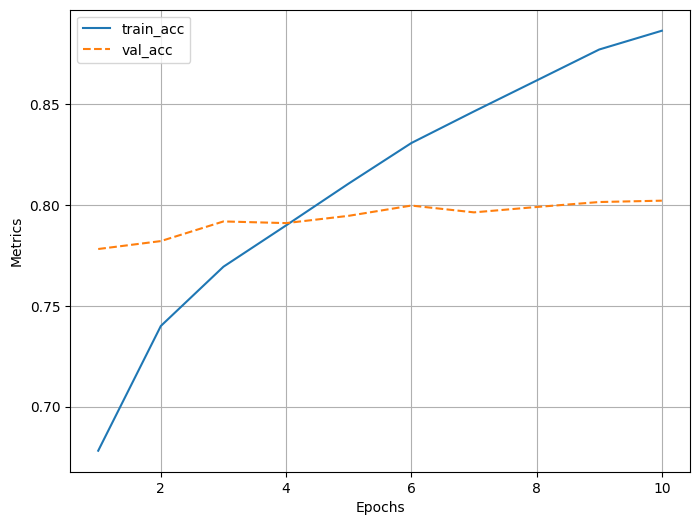

In [197]:
log.plot_epochs(["train_acc","val_acc"])

100%|██████████| 111/111 [00:00<00:00, 1055.92it/s]


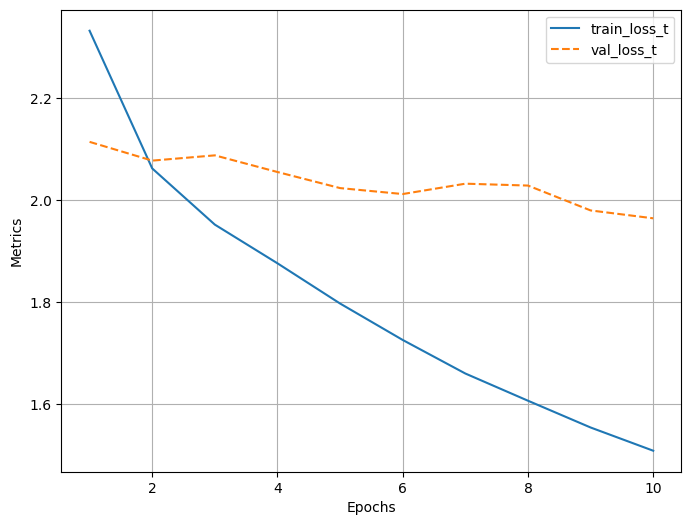

In [198]:
log.plot_epochs(["train_loss_t","val_loss_t"])

In [199]:
torch.save(rcnn.state_dict(), "rcnn_model_save")

In [200]:
!zip -r /content/rcnn_saved_model.zip /content/rcnn_model_save

updating: content/rcnn_model_save (deflated 8%)


In [201]:
# files.download('/content/rcnn_saved_model.zip')

In [202]:
#!wget https://github.com/Jothish2283/RCNN_torch/raw/main/rcnn_saved_model.zip

In [203]:
# import zipfile
# zip_ref=zipfile.ZipFile("rcnn_saved_model.zip")
# zip_ref.extractall()
# zip_ref.close()

In [204]:
# rcnn_loaded_model=RCNN()
# rcnn_loaded_model.load_state_dict(torch.load("content/rcnn_model_save", map_location=device))

#**Testing on custom images**

In [205]:
from torchvision.ops import nms
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [206]:
import requests
def download_img(link, name):
  request=requests.get(str(link))
  with open(str(name)+".jpg", "wb") as local_file:
    local_file.write(request.content)
    local_file.close

In [207]:
links_dict={"2bus": "https://c8.alamy.com/comp/AJCRA5/two-buses-at-bus-stop-AJCRA5.jpg",
            "bus": "https://files.guidedanmark.org/files/485/285492_gratis-bus-lasse-hjort-gdk.jpg",
            "truck_1": "https://di-uploads-pod34.dealerinspire.com/vancechevroletbuickgmc/uploads/2021/04/2020-silverado-1500-trail-boss-mov.jpg",
            "truck_2": "https://media.wired.com/photos/60f9b8a417ecd990dacf3c75/191:100/w_1280,c_limit/Business-Self-Driving-Trucks-TuSimple.jpg",
            "ship": "https://robbreport.com/wp-content/uploads/2022/08/Residential_Ship12.jpg"}

for name in links_dict:
  download_img(links_dict[name], name)

In [208]:
# target2label={0:"Background", 1:"Bus", 2:"Truck"}

In [209]:
def test_predictions(filename, show_output=True):
    img = np.array(cv2.imread(filename, 1)[...,::-1])
    candidates = select_candidates(img)
    candidates = [(x,y,x+w,y+h) for x,y,w,h in candidates]
    input = []
    for candidate in candidates:
        x,y,X,Y = candidate
        crop = cv2.resize(img[y:Y,x:X], (224,224))
        input.append(preprocess_image(crop/255.)[None])
    input = torch.cat(input).to(device)
    with torch.no_grad():
        rcnn.eval()
        probs, deltas = rcnn(input)
        confs, clss = torch.max(probs, -1)
    candidates = np.array(candidates)
    confs, clss, probs, deltas = [tensor.detach().cpu().numpy() for tensor in [confs, clss, probs, deltas]]
    ixs = clss!=0
    confs, clss, probs, deltas, candidates = [tensor[ixs] for tensor in [confs, clss, probs, deltas, candidates]]
    bbs = (candidates + deltas).astype(np.uint16)
    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    confs, clss, probs, deltas, candidates, bbs = [tensor[ixs] for tensor in [confs, clss, probs, deltas, candidates, bbs]]
    if len(ixs) == 1:
        confs, clss, probs, deltas, candidates, bbs = [tensor[None] for tensor in [confs, clss, probs, deltas, candidates, bbs]]
    if len(confs) == 0 and not show_output:
        return (0,0,224,224), 'background', 0
    if len(confs) > 0:
        best_pred = np.argmax(confs)
        best_conf = np.max(confs)
        best_bb = bbs[best_pred]
        x,y,X,Y = best_bb
    _, ax = plt.subplots(1, 2, figsize=(20,10))
    show(img, ax=ax[0])
    ax[0].grid(False)
    ax[0].set_title('Original image')
    if len(confs) == 0:
        ax[1].imshow(img)
        ax[1].set_title('No objects')
        plt.show()
        return

    ax[1].set_title(label_encoder.inverse_transform(list([clss[best_pred]])))
    show(img, bbs=bbs.tolist(), texts=label_encoder.inverse_transform(clss.tolist()), ax=ax[1], title='predicted bounding box and class')
    plt.show()
    return (x,y,X,Y), label_encoder.inverse_transform(list([clss[best_pred]])), best_conf

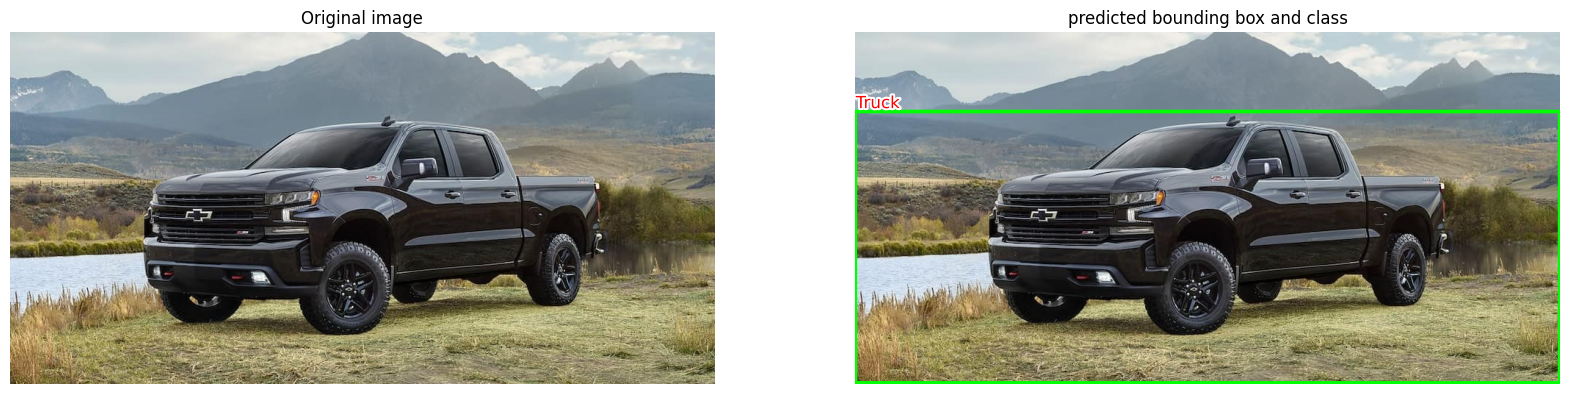

((0, 109, 959, 478), array(['Truck'], dtype=object), 0.9995072)

In [210]:
test_predictions("/content/truck_1.jpg")

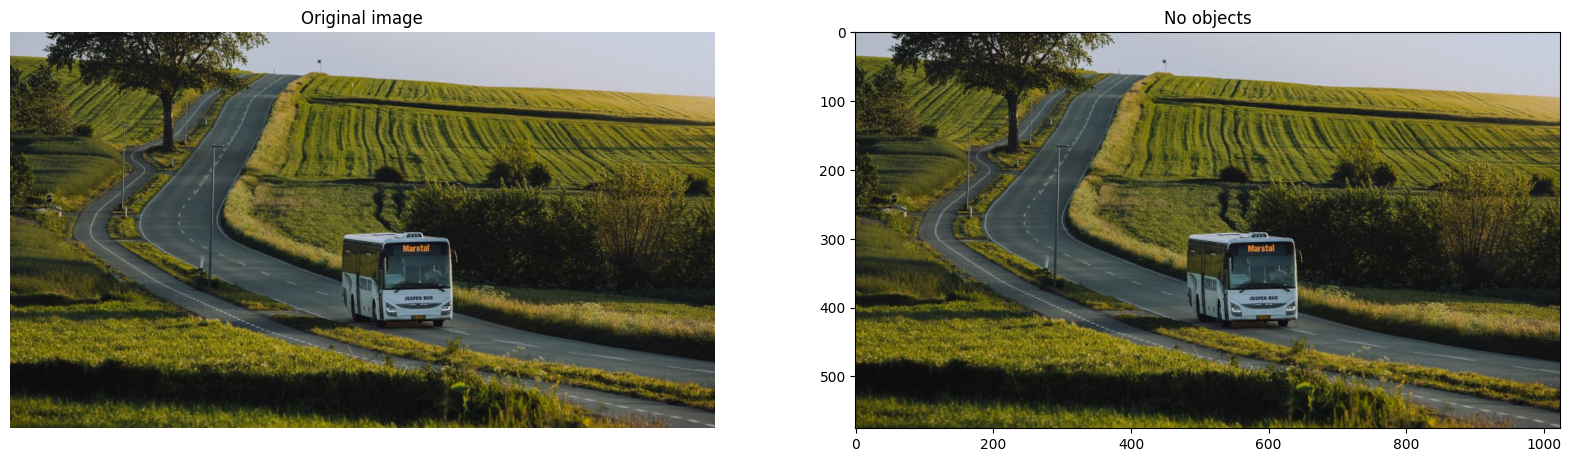

In [211]:
test_predictions("bus.jpg")

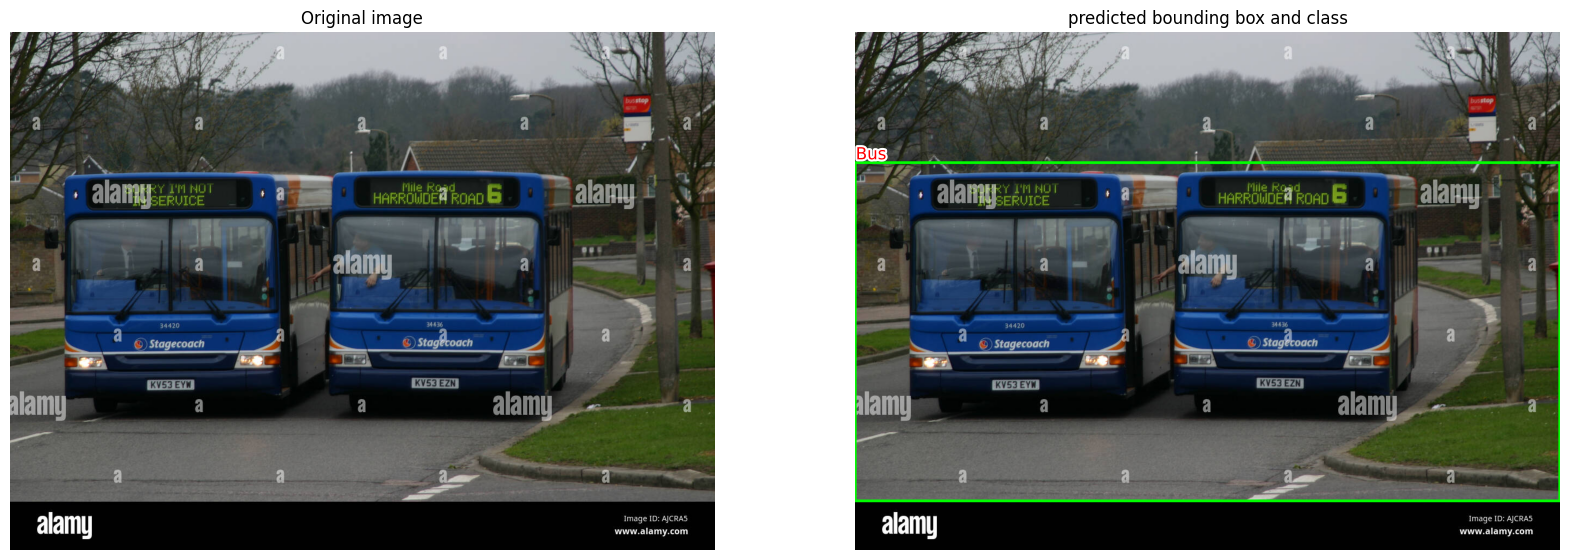

((0, 242, 1299, 865), array(['Bus'], dtype=object), 0.99986315)

In [212]:
test_predictions("2bus.jpg")

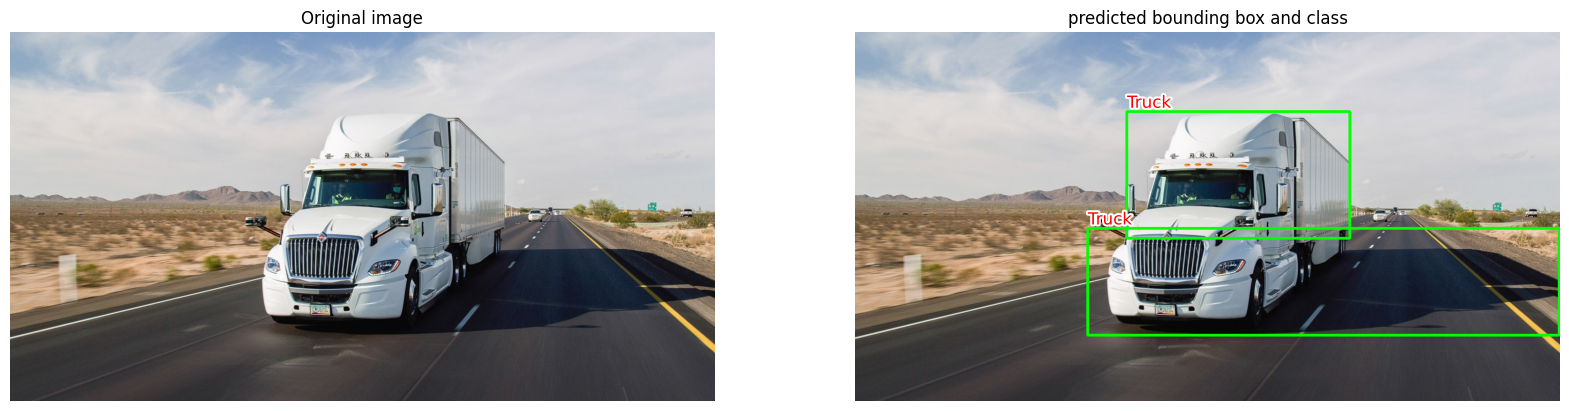

((422, 356, 1278, 550), array(['Truck'], dtype=object), 0.9875091)

In [213]:
test_predictions("truck_2.jpg")

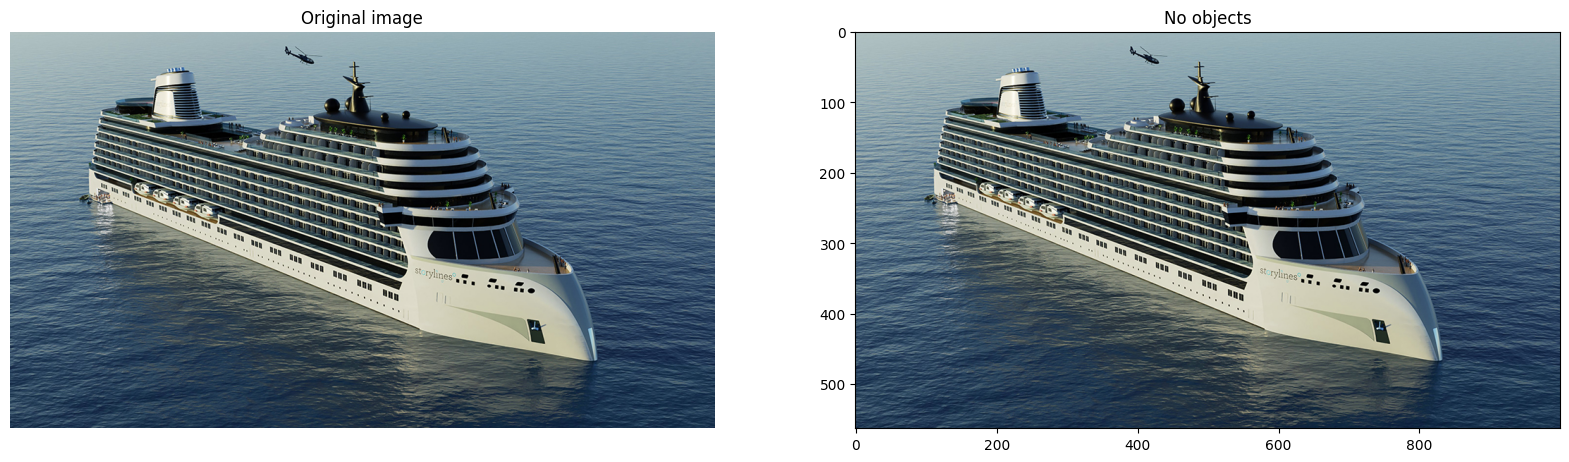

In [214]:
test_predictions("ship.jpg")

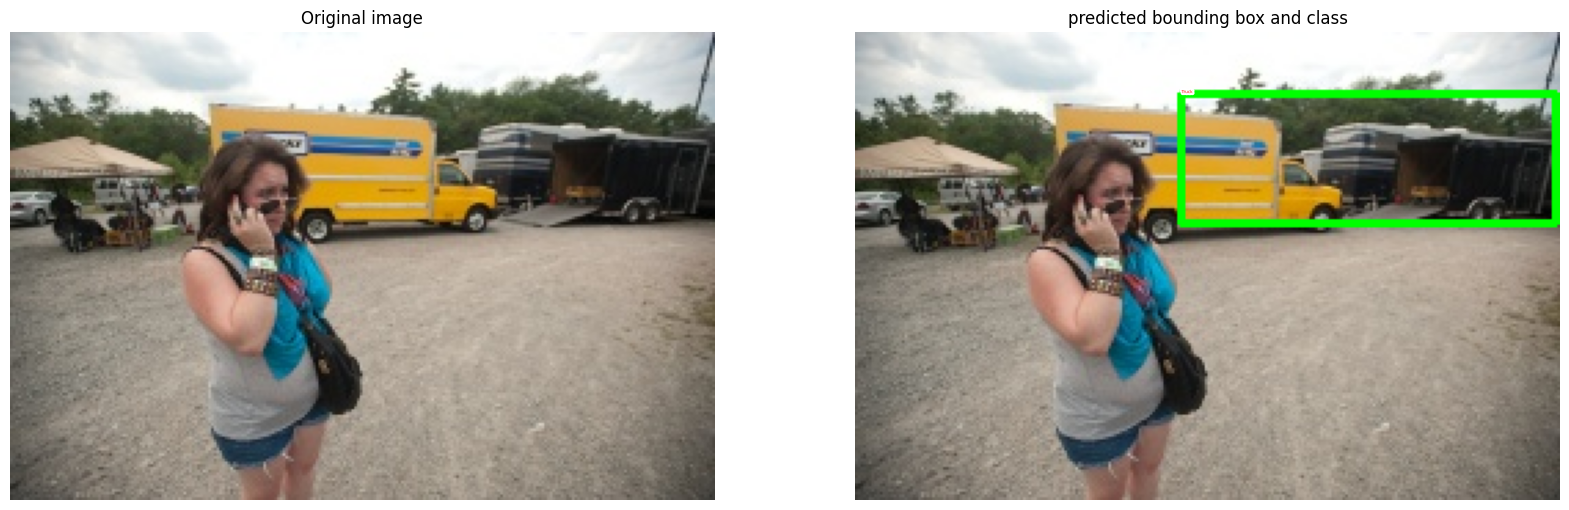

((118, 22, 254, 69), array(['Truck'], dtype=object), 0.97602296)

In [215]:
test_predictions(FPATHS[1])

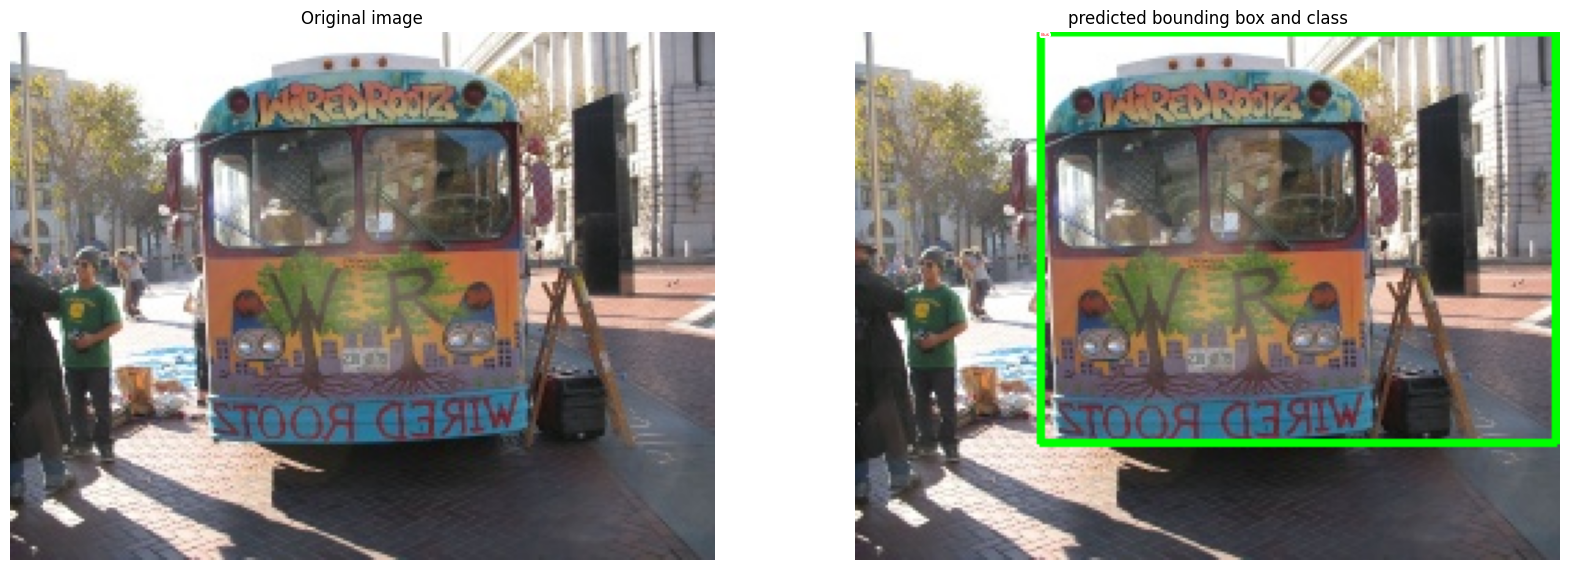

((67, 0, 254, 149), array(['Bus'], dtype=object), 0.9978948)

In [216]:
test_predictions(FPATHS[45])